> **Permodelan Klasifikasi Menggunakan Supervised Learning**

# Sumber Data
> Data ini diperoleh dari Kaggle dengan link berikut.
https://www.kaggle.com/competitions/titanic/data?select=train.csv

> Deskripsi data

Di data Titanic ini, setiap variabel memiliki perannya masing-masing dalam menjelaskan karakteristik penumpang. Berikut penjelasan untuk masing-masing variabel:

- **survival**: Menunjukkan apakah penumpang selamat atau tidak dari kecelakaan Titanic. Nilai 0 berarti tidak selamat, dan nilai 1 berarti selamat.
- **pclass**: Kelas tiket penumpang. Ada tiga kelas: 1st (kelas pertama), 2nd (kelas kedua), dan 3rd (kelas ketiga). Biasanya, kelas pertama menunjukkan penumpang yang lebih kaya, sementara kelas ketiga lebih murah dan banyak dihuni penumpang dengan status ekonomi lebih rendah.
- **sex**: Jenis kelamin penumpang, biasanya berupa "male" (laki-laki) atau "female" (perempuan).
- **Age**: Usia penumpang dalam tahun. Usia penting karena bisa membantu melihat bagaimana kelompok umur tertentu mungkin lebih rentan atau lebih mungkin selamat.
- **sibsp**: Jumlah saudara kandung atau pasangan yang ikut di Titanic. Ini menunjukkan apakah penumpang bepergian bersama keluarga atau sendirian.
- **parch**: Jumlah orang tua atau anak yang ikut di Titanic. Sama seperti `sibsp`, ini menunjukkan apakah penumpang bepergian dengan keluarga.
- **ticket**: Nomor tiket penumpang. Ini mungkin tidak terlalu penting dalam analisis, tapi bisa digunakan untuk identifikasi spesifik.
- **fare**: Jumlah uang yang dibayar untuk tiket. Biasanya, penumpang kelas pertama membayar lebih mahal daripada kelas lainnya.
- **cabin**: Nomor kabin tempat penumpang menginap di kapal. Tidak semua penumpang memiliki nomor kabin yang tercatat.
- **embarked**: Pelabuhan tempat penumpang naik ke kapal. Ada tiga pelabuhan:
  - **C** = Cherbourg (Prancis)
  - **Q** = Queenstown (Irlandia)
  - **S** = Southampton (Inggris)

Semua variabel ini bisa digunakan untuk menganalisis pola keselamatan penumpang Titanic, misalnya apakah penumpang kelas pertama lebih mungkin selamat dibandingkan kelas lainnya, atau apakah usia dan jenis kelamin mempengaruhi tingkat keselamatan.

In [1]:
# import library pandas, Matplotlib dan NumPy untuk analisis dan manipulasi data.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# visualisasi Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Library untuk melatih model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# **Eksplorasi analisis data (EDA)**



EDA ini digunakan untuk mengetahui seputar data seperti jenis data, mengecek data yang hilang, menambahkan, mengubah, atau menghapus fitur untuk memaksimalkan data dan melihat outlier.



In [2]:
from google.colab import files

uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
# Memuat data atau membaca data
df = pd.read_csv("train.csv")
df.shape # (rows, columns)

(891, 12)

In [4]:
# Melihat data 5 baris dari atas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Melihat Missing Value


In [5]:
# Mengecek missing value
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [7]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [8]:
# Buang variabel yang tidak dibutuhkan
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], errors='ignore')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [11]:
# Melihat Ringkasan Data dan hanya bertipe integer yang bisa dibaca
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualisasi


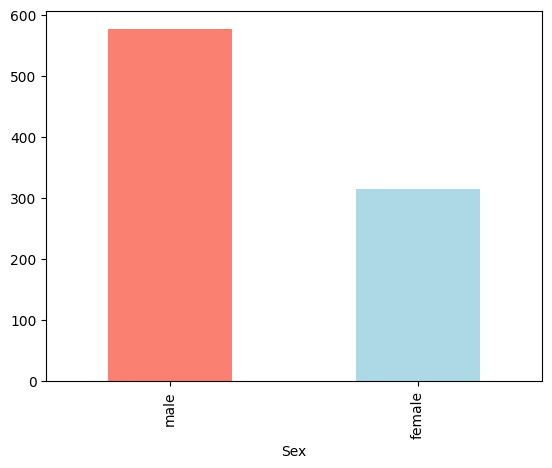

In [12]:
df["Sex"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

Pada diagram batang tersebut menunjukan penumpang terbanyak kapal titanic berjenis kelamin laki-laki.


In [13]:
# Membandingkan kolom penumpang selamat atau tidaknya berdasarkan jenis kelamin
pd.crosstab(df.Survived, df.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


> Jumlah penumpang laki-laki yang selamat sebanyak 109 orang, untuk penumpang perempuan yang selamat sebanyak 233 orang, dan diyatakan meninggal baik laki-laki maupun perempuan dengan total 549 orang.

> Berikut adalah visualisasinya.

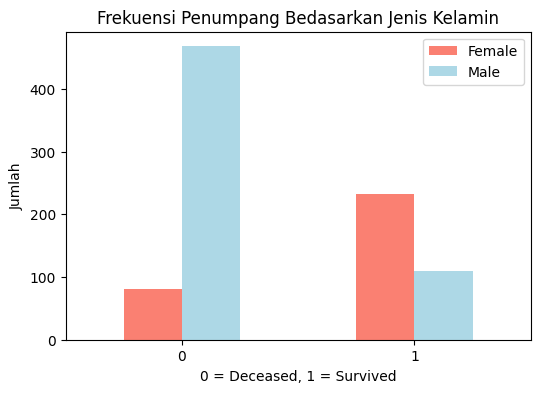

In [14]:
# Membuat crosstab
pd.crosstab(df.Survived, df.Sex).plot(kind="bar",
                                    figsize=(6, 4),
                                    color=["salmon", "lightblue"])
plt.title("Frekuensi Penumpang Bedasarkan Jenis Kelamin")
plt.xlabel("0 = Deceased, 1 = Survived")
plt.ylabel("Jumlah")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

## Korelasi Matriks

> Mengapa diperlukan membuat korelasi matriks ? karena matriks ini nantinya digunakan untuk mendapatkan nilai kedekatan hubungan antar variabel penelitian.

Sebelum membuat matriks korelasi,dilakukan preprocesing data untuk memastikan kualitas data yang baik dengan sintaks berikut.

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)

> Selanjutnya, untuk memastikan apakah data label sudah berubah menjadi data numerik menggunakan sintaks berikut.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int64
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Fare      891 non-null    int64
 7   Embarked  891 non-null    int64
dtypes: int64(8)
memory usage: 55.8 KB


In [17]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.058003,-0.026385,0.081629,0.333943,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.346194,0.078141,0.018443,-0.724119,0.162098
Sex,-0.543351,0.131900,1.000000,0.075713,-0.123164,-0.245489,-0.265389,0.108262
Age,-0.058003,-0.346194,0.075713,1.000000,-0.245214,-0.158665,0.131373,-0.014086
SibSp,-0.026385,0.078141,-0.123164,-0.245214,1.000000,0.423338,0.368688,0.065635
Parch,0.081629,0.018443,-0.245489,-0.158665,0.423338,1.000000,0.361243,0.039798
Fare,0.333943,-0.724119,-0.265389,0.131373,0.368688,0.361243,1.000000,-0.158036
Embarked,-0.167675,0.162098,0.108262,-0.014086,0.065635,0.039798,-0.158036,1.000000


(8.0, 0.0)

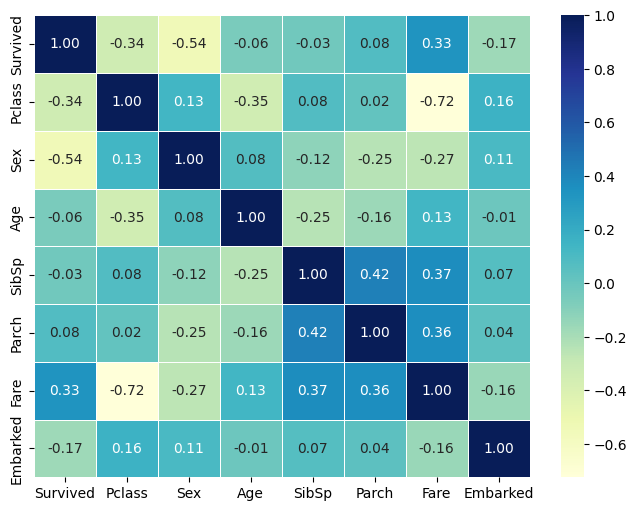

In [18]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim()

1. Faktor yang SANGAT berpengaruh terhadap keselamatan:
- Gender (`Sex`): -0.54 → Perempuan lebih tinggi peluang selamat
- Kelas tiket (`Pclass`): -0.34 → Kelas tiket tinggi lebih berpeluang selamat
- Harga tiket (`Fare`): 0.33 → Tiket mahal lebih berpeluang selamat

2. Faktor yang KURANG berpengaruh:
- Umur (`Age`): -0.06
- Jumlah keluarga (`SibSp`, `Parch`): -0.03, 0.08
- Pelabuhan keberangkatan (`Embarked`): -0.17

Catatan penting:
- `Fare` dan `Pclass` saling berkorelasi kuat (-0.72) → wajar karena kelas tinggi harga lebih mahal
- Fokus ke `Sex` dan `Pclass` sebagai prediktor utama untuk model

# Melakukan Permodelan

> Mendefinisikan variabel dependen dengan Survived karena ingin memprediksi apakah seseorang selamat dari tragedi kecelakaan kapal titanic atau tidak. Untuk variabel independen variabel yang tersisa selain Survived.

In [19]:
# Split data pada x dan y
x = df.drop("Survived", axis=1)
y = df["Survived"]


In [20]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,28,1,0,18,2
1,0,0,51,1,0,207,0
2,2,0,34,0,0,41,2
3,0,0,47,1,0,189,2
4,2,1,47,0,0,43,2
...,...,...,...,...,...,...,...
886,1,1,35,0,0,85,2
887,0,0,24,0,0,153,2
888,2,0,36,1,2,131,2
889,0,1,34,0,0,153,0


In [21]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# Evaluasi Model

> Metode evaluasi model ini membagi dataset menjadi dua bagian yakni bagian yang digunakan untuk training data dan untuk testing data dengan proporsi tertentu. Train data digunakan untuk fit model machine learning, sedangkan test data digunakan untuk mengevaluasi hasil fit model tersebut.

> Selanjutnya, Membagi data pelatihan sebesar 80% dan data testing sebesar 20% dengan sintaks berikut.

In [22]:
x_train = np.array(x[0:int(0.80*len(x))])
y_train = np.array(y[0:int(0.80*len(y))])
x_test = np.array(x[int(0.80*len(x)):])
y_test = np.array(y[int(0.80*len(y)):])
len(x_train), len(y_train), len(x_test), len(y_test)

(712, 712, 179, 179)

# Melatih Model


> inisiasi model dalam variabel berikut.

In [23]:
LogReg = LogisticRegression()
KNN = KNeighborsClassifier()
NB = GaussianNB()

# Fungsi kernel digunakan untuk masalah non linier diubah ke linier
SVM = SVC(kernel='rbf')
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()

In [24]:
LogReg_fit = LogReg.fit(x_train, y_train)
KNN_fit = KNN.fit(x_train, y_train)
NB_fit = NB.fit(x_train, y_train)
SVM_fit = SVM.fit(x_train, y_train)
DT_fit = DT.fit(x_train, y_train)
RF_fit = RF.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


> Membuat Prediksi Model

In [25]:
LogReg_pred = LogReg_fit.predict(x_test)
KNN_pred = KNN_fit.predict(x_test)
NB_pred = NB_fit.predict(x_test)
SVM_pred = SVM_fit.predict(x_test)
DT_pred = DT_fit.predict(x_test)
RF_pred = RF_fit.predict(x_test)

y_pred = (LogReg_pred, KNN_pred, NB_pred, SVM_pred, DT_pred, RF_pred)


> Sekarang model pelatihan disimpan dalam variabel di atas. Kemudian dilakukan memprediksi Test Data Set dan membandingkan skor akurasi

# Akurasi

In [26]:
from sklearn.metrics import accuracy_score
print("Logistic Regression is %f percent accurate" % (accuracy_score(LogReg_pred, y_test)*100))
print("KNN is %f percent accurate" % (accuracy_score(KNN_pred, y_test)*100))
print("Naive Bayes is %f percent accurate" % (accuracy_score(NB_pred, y_test)*100))
print("SVM is %f percent accurate" % (accuracy_score(SVM_pred, y_test)*100))
print("Decision Trees is %f percent accurate" % (accuracy_score(DT_pred, y_test)*100))
print("Random Forests is %f percent accurate" % (accuracy_score(RF_pred, y_test)*100))

Logistic Regression is 82.681564 percent accurate
KNN is 70.391061 percent accurate
Naive Bayes is 81.005587 percent accurate
SVM is 71.508380 percent accurate
Decision Trees is 75.418994 percent accurate
Random Forests is 81.005587 percent accurate


Didapatkan output dari perbandingan keenam metode tersebut, model yang paling baik menggunakan model regresi logistik dengan tingkat akurasi sebesar 82,681564 %

> Menguji apakah tingkat akurasinya regresi logistik modelnya akurat atau tidak dengan sintaks berikut.

In [27]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = LogReg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

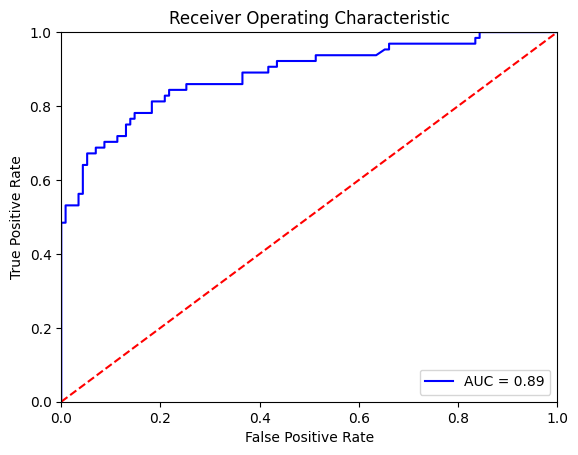

In [28]:
# membuat plot dengan plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Menurut Metx (1978),Interpretasi nilai Area Under Curve (AUC) di klasifikasikan 5 bagian yang berbeda, yaitu dikatakan tingkat akurasi antara 0.50 - 0.60 (sangat lemah), 0.60 - 0.70 (lemah), 0.70 - 0.80 (sedang), 0.80 - 0.90 (tinggi), dan 0.90 - 1.00 (sangat tinggi).

Pada hasil grafik AUC tersebut diperoleh 0.89 maka, tingkat akurasi menggunakan model regresi logistik sangat tinggi.

# Uji Ketepatan Akurasi dengan Confusion Matrix

> confusion matrix memberikan informasi perbandingan hasil klasifikasi yang dilakukan oleh sistem (model) dengan hasil klasifikasi sebenarnya. Confusion matrix berbentuk tabel matriks yang menggambarkan kinerja model klasifikasi pada serangkaian data uji yang nilai sebenarnya diketahui.

dikarenakan pada akurasi dari keenam model supervised learning model yang baik menggunakan naive bayes maka diuji ulang menggunakan confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, LogReg_pred)

array([[102,  13],
       [ 18,  46]])

didapatkan nilai TP (True Positive) pada matriks 46, untuk nilai Tipe I eror FP (False Positive) 13, nilai Tipe II eror FN (False Negatif) 18, dan nilai TN (True Negative) 102.

untuk membuat visualisasi, import seaborn terlebih dahulu untuk menjalankan heatmap untuk membuat matrixplot.

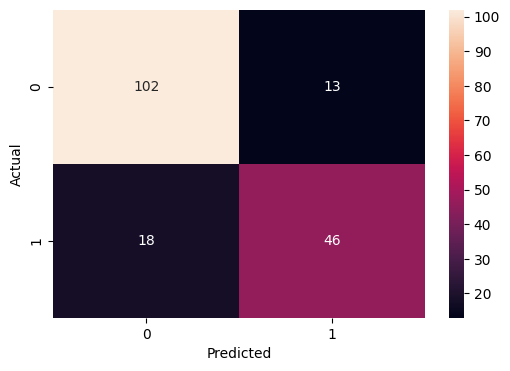

In [36]:
# Visualisasi matriks
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, LogReg_pred), annot=True, fmt=".0f", ax=ax)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Jadi kesimpulannya:
1.   102 penumpang diprediksi dengan benar meninggal
2.   46 penumpang diprediksi dengan benar selamat
3.   Total prediksi benar: 102 + 46 = 148 penumpang dari total 179 penumpang

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, LogReg_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       115
           1       0.78      0.72      0.75        64

    accuracy                           0.83       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.83      0.83       179



Analisa hasil:

1. Recall untuk kelas 0 (meninggal) = 0.89 atau 89%
- Artinya: dari semua penumpang yang sebenarnya meninggal, 89% berhasil diprediksi dengan benar sebagai meninggal
- Interpretasi: Model sangat baik dalam mengidentifikasi penumpang yang meninggal, hanya 11% yang salah diprediksi sebagai selamat

2. Recall untuk kelas 1 (selamat) = 0.72 atau 72%
- Artinya: dari semua penumpang yang sebenarnya selamat, 72% berhasil diprediksi dengan benar sebagai selamat
- Interpretasi: Model cukup baik dalam mengidentifikasi penumpang yang selamat, namun 28% salah diprediksi sebagai meninggal

Kesimpulan:
- Model lebih baik dalam mengidentifikasi penumpang yang meninggal (89%) dibandingkan yang selamat (72%)
- Ini menunjukkan model cenderung "konservatif" dalam memprediksi keselamatan - lebih jarang memprediksi seseorang akan selamat
- Mungkin ada faktor-faktor penting yang belum tercakup dalam model untuk lebih akurat memprediksi keselamatan penumpang.
